# movieからimageファイルを作成

youtubeの動画からipgを切り出す

In [0]:
#直接youtubeからダウンロードする

!pip install youtube-dl

In [2]:
import youtube_dl

#youtubeのurlを指定
url = "https://youtu.be/7rHLb80Vfs0"

ydl = youtube_dl.YoutubeDL({'outtmpl': '%(id)s%(ext)s','format':'137'})
with ydl:
    result = ydl.extract_info(url,download=True)

[youtube] 7rHLb80Vfs0: Downloading webpage
[youtube] 7rHLb80Vfs0: Downloading video info webpage
[youtube] 7rHLb80Vfs0: Downloading MPD manifest
[dashsegments] Total fragments: 4
[download] Destination: 7rHLb80Vfs0mp4
[download] 100% of 7.95MiB in 00:02


### 対象youtubeリンク
[ザ・プレミアム・モルツ『夏の神泡（矢沢永吉）』篇 15秒 矢沢永吉 サントリー CM](https://youtu.be/7rHLb80Vfs0)

In [21]:
import cv2

#動画ファイルpathを指定
video_path = "7rHLb80Vfs0mp4"

cap = cv2.VideoCapture(video_path)

# 幅
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
# 高さ
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
# 総フレーム数
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
# fps
fps = cap.get(cv2.CAP_PROP_FPS)

print("width:{}, height:{}, count:{}, fps:{}".format(width,height,count,fps))

width:1920.0, height:1080.0, count:360.0, fps:23.976023976023978


In [0]:
#保存用ディレクトリ作成
!mkdir image

In [9]:
#全フレームを保存する場合(countの数だけのimage)

import os
import sys

# 写真保存用ディレクトリを指定
IMAGE_SAVE_DIR = "image"

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imwrite("{}/picture{:0=3}".format(IMAGE_SAVE_DIR,num)+".jpg",frame)
        num += 1
        if num % 100 == 0:
            print(num)
    else:
        break

cap.release()

100
200
300


In [23]:
#フレームレートを調節して保存する場合

from PIL import Image
import numpy as np
import datetime

#fpsを倍数してやると秒数をコントロールできる
#例　int(fps)*3   3秒おき

per_seconds = 1

##########画像のリサイズ有無#########
resize = True
#2分の1にリサイズ
w = int(width/2)
h = int(height/2)

##########動画撮影時の日時秒までを入れファイル名にする#######
start_time = datetime.datetime(2019,5,20,20,15,0)

# 写真保存用ディレクトリを指定
IMAGE_SAVE_DIR = "image"


loop_count = 0
for num in range(1, int(count), int(fps)*per_seconds):
    cap.set(cv2.CAP_PROP_POS_FRAMES, num)
    img = cap.read()[1]
    
    if resize == True:
        #一旦イメージにしてから
        img = Image.fromarray(np.uint8(img))
        #ここで写真のリサイズ
        img = img.resize((w,h))
        #再度numpy arrayに戻して
        img = np.asarray(img)

    
    img_name = int(start_time.timestamp())
    cv2.imwrite("{}/{}.jpg".format(IMAGE_SAVE_DIR, str(img_name)), img)
    start_time = start_time + datetime.timedelta(seconds=per_seconds)
    
    if loop_count % 50 == 0:
        print (loop_count)
    loop_count += 1
    
    
#cv2.VideoCapture()を解放
cap.release()

0


In [24]:
%cd image
!ls

/content/image
1558383300.jpg	1558383304.jpg	1558383308.jpg	1558383312.jpg
1558383301.jpg	1558383305.jpg	1558383309.jpg	1558383313.jpg
1558383302.jpg	1558383306.jpg	1558383310.jpg	1558383314.jpg
1558383303.jpg	1558383307.jpg	1558383311.jpg	1558383315.jpg


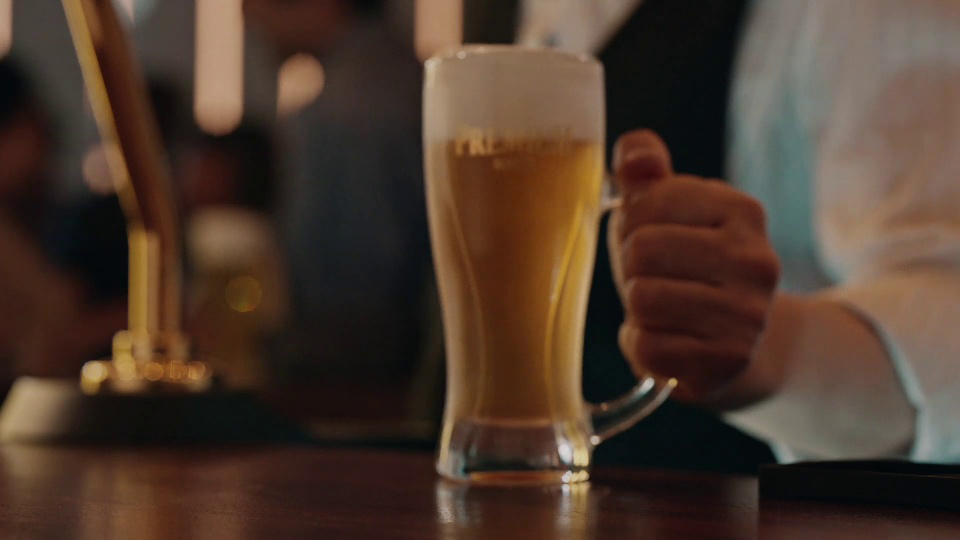

In [27]:
Image.open("1558383300.jpg")